In [23]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Loading dataset
customer_df = pd.read_csv("../data/processed/customer_level_data.csv")
customer_df.head()

,customerid,first_purchase,last_purchase,total_orders,total_revenue,tenure_days
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,1,77183.60,0
1,12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,7,4310.00,365
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,4,1797.24,282
3,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,1,1757.55,0
4,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,1,334.40,0


In [25]:
customer_df["customer_type"] = customer_df["total_orders"].apply(
    lambda x: "Returning" if x > 1 else "One-time"
)

In [26]:
customer_df["customer_type"].value_counts(normalize=True) * 100

customer_type
Returning    65.583218
One-time     34.416782
Name: proportion, dtype: float64

In [27]:
# Calculating the proportion of returning customers

repeat_rate = (
    customer_df[
        customer_df["total_orders"] > 1
    ].shape[0] / customer_df.shape[0]
) * 100

repeat_rate

65.58321807284463

Cohort Analysis

In [28]:
df = pd.read_csv("../data/processed/clean_retail_data.csv")
df["invoicedate"] = pd.to_datetime(df["invoicedate"])

df["purchase_month"] = df["invoicedate"].dt.to_period("M")

In [29]:
df["cohort_month"] = df.groupby("customerid")["purchase_month"].transform("min")

In [30]:
def cohort_index(row):
    return (
        (row["purchase_month"].year - row["cohort_month"].year) * 12
        + (row["purchase_month"].month - row["cohort_month"].month)
        + 1
    )


df["cohort_index"] = df.apply(cohort_index, axis=1)

In [31]:
cohort_data = (
    df.groupby(["cohort_month", "cohort_index"])["customerid"].nunique().reset_index()
)

In [32]:
customer_df.to_csv("../data/processed/customer_retention_summary.csv", index=False)
cohort_data.to_csv("../data/processed/cohort_table.csv", index=False)

In [33]:
cohort_data = pd.read_csv("../data/processed/cohort_table.csv")
cohort_data.head()

,cohort_month,cohort_index,customerid
0,2010-12,1,885
1,2010-12,2,324
2,2010-12,3,286
3,2010-12,4,340
4,2010-12,5,321


In [34]:
cohort_matrix = cohort_data.pivot(
    index = "cohort_month",
    columns = "cohort_index",
    values = "customerid"
)

cohort_matrix

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
cohort_sizes = cohort_matrix.iloc[:, 0]

retention_matrix = cohort_matrix.divide(cohort_sizes, axis=0)

retention_matrix = retention_matrix * 100

retention_matrix

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12,100.0,36.610169,32.316384,38.418079,36.271186,39.774011,36.271186,34.915254,35.367232,39.548023,37.401130,50.282486,26.553672
2011-01,100.0,22.062350,26.618705,23.021583,32.134293,28.776978,24.700240,24.220624,29.976019,32.613909,36.450839,11.750600,NaN
2011-02,100.0,18.684211,18.684211,28.421053,27.105263,24.736842,25.263158,27.894737,24.736842,30.526316,6.842105,NaN,NaN
2011-03,100.0,15.044248,25.221239,19.911504,22.345133,16.814159,26.769912,23.008850,27.876106,8.628319,NaN,NaN,NaN
2011-04,100.0,21.333333,20.333333,21.000000,19.666667,22.666667,21.666667,26.000000,7.333333,NaN,NaN,NaN,NaN
2011-05,100.0,19.014085,17.253521,17.253521,20.774648,23.239437,26.408451,9.507042,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,17.355372,15.702479,26.446281,23.140496,33.471074,9.504132,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,18.085106,20.744681,22.340426,27.127660,11.170213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,20.710059,24.852071,24.260355,12.426036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
retention_matrix.to_csv("../data/processed/retention_matrix.csv")

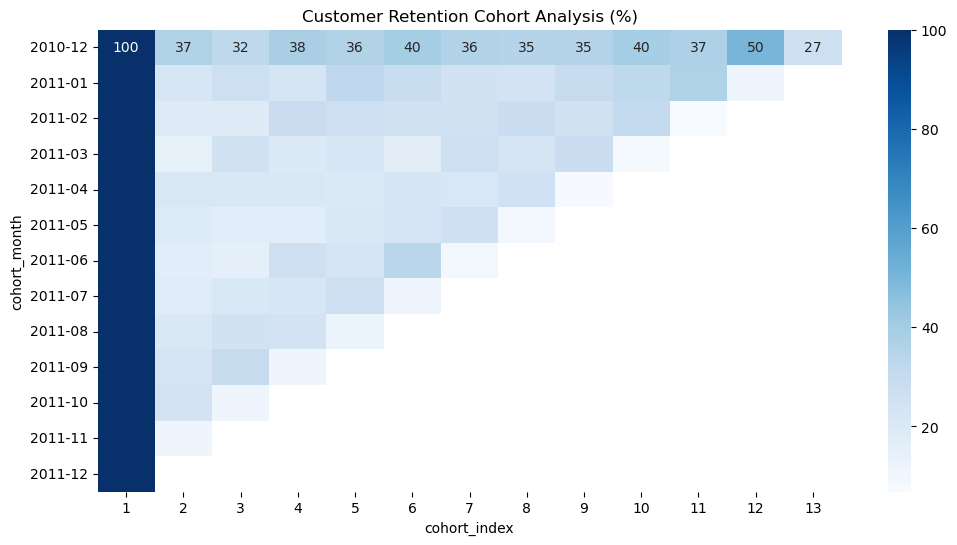

In [37]:
plt.figure(figsize=(12, 6))
sns.heatmap(retention_matrix, annot=True, fmt=".0f", cmap="Blues")
plt.title("Customer Retention Cohort Analysis (%)")
plt.show()